# Lecture 12 - Conjugate Priors; Online Update

In [2]:
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import multivariate_normal
import textwrap

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

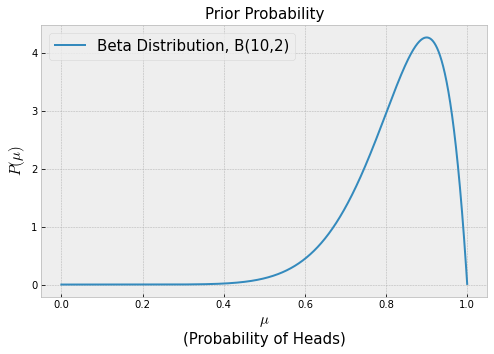

[1]
MLE aka Frequentist Probability of Heads =  1.0
MAP aka Bayesian Probability of Heads =  0.9090909090909091
Press enter to flip the coin again...

[1, 0]
MLE aka Frequentist Probability of Heads =  0.5
MAP aka Bayesian Probability of Heads =  0.8333333333333334
Press enter to flip the coin again...

[1, 0, 1]
MLE aka Frequentist Probability of Heads =  0.6666666666666666
MAP aka Bayesian Probability of Heads =  0.8461538461538461
Press enter to flip the coin again...

[1, 0, 1, 1]
MLE aka Frequentist Probability of Heads =  0.75
MAP aka Bayesian Probability of Heads =  0.8571428571428571
Press enter to flip the coin again...

[1, 0, 1, 1, 1]
MLE aka Frequentist Probability of Heads =  0.8
MAP aka Bayesian Probability of Heads =  0.8666666666666667
Press enter to flip the coin again...

[1, 0, 1, 1, 1, 0]
MLE aka Frequentist Probability of Heads =  0.6666666666666666
MAP aka Bayesian Probability of Heads =  0.8125
Press enter to flip the coin again...

[1, 0, 1, 1, 1, 0, 0]
MLE aka 

In [8]:
trueMU = 0.5 # 0.5 for a fair coin
Nflips = 10
a = 10
b = 2
x = np.arange(0,1,0.0001)
Beta = (math.gamma(a+b)/(math.gamma(a)*math.gamma(b)))*x**(a-1)*(1-x)**(b-1)

plt.figure(figsize=(8,5))
plt.plot(x, Beta, label='Beta Distribution, B('+str(a)+','+str(b)+')')
plt.legend(loc='best',fontsize=15)
plt.xlabel('$\mu$\n(Probability of Heads)',size=15)
plt.ylabel('$P(\mu)$',size=15); 
plt.title('Prior Probability', size=15)
plt.show();

Outcomes = []
for i in range(Nflips):
    Outcomes += [stats.bernoulli(trueMU).rvs(1)[0]]
    print(Outcomes)
    print('MLE aka Frequentist Probability of Heads = ', np.sum(Outcomes)/len(Outcomes))
    print('MAP aka Bayesian Probability of Heads = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    input('Press enter to flip the coin again...\n')

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})$$

In **Maximum Likelihood Estimation** we *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{w})$. We find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align}
& \arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{t})
\end{align}

In **Maximum A Posteriori** we *find the set of parameters* that **maximize** the the posterior probability $P(\mathbf{w}|\mathbf{t})$. We find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

# Conjugate Priors

* If the posterior probability and the prior probability have the same (parametric) form, they are said to have a **conjugate prior** relationship.

    * For example, consider the data likelihood $P(\mathbf{t}|\mu) \sim \mathcal{N}(\mu, \sigma^2)$ and the prior distribution $P(\mu) \sim \mathcal{N}(\mu_0,\sigma_0^2)$. The posterior probability will also be Gaussian distributed
    
$$P(\mu|\mathbf{t}) \sim \mathcal{N}\left(\frac{\sum_{i=1}^N x_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2+\sigma^2},\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1}\right)$$

<!--Proof: 

\begin{align}
P(\mu|X) &\propto P(X|\mu)P(\mu) \\
& = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right)\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(\sum_{i=1}^N \left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right) -\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2} +\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\frac{\sum_{i=1}^N x_i^2-2\sum_{i=1}^N x_i\mu +\mu^2N)}{\sigma^2} +\frac{\mu^2-2\mu\mu_0 +\mu_0^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right) - 2\mu \left( \frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) + \frac{\sum_{i=1}^N x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right) \left(\mu^2 - 2\mu\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right)\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1} \right) \right) \exp\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right)
\end{align} -->

* There are many conjugate prior relationships, e.g., Bernoulli-Beta, Gausian-Gaussian, Gaussian-Inverse Wishart, Multinomial-Dirichlet.

Conjugate prior relationships play an important role for **online updating** of the prior distribution.

* In an online model estimation scenario, where the posterior has the same form as the prior, we can use the posterior as our new prior. This new prior is now **data-informed** and will update its parameters based on (1) our initial choice, and (2) the data. 

## Conjugate Prior Relationship: Gaussian-Gaussian

For a D-dimensional Gaussian data likelihood with mean $\mu$ and covariance $\beta\mathbf{I}$ and a prior distribution with mean $\mu_0$ and covariance $\Sigma_0$

\begin{align}
P(\mathbf{t}|\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}, \beta\mathbf{I}) \\
P(\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}_0,\Sigma_0)
\end{align}

The posterior distribution

\begin{align}
P(\mathbf{w}|\mathbf{t}) &\sim \mathcal{N}\left(\mathbf{\mu}_N, \Sigma_N\right) \\
\mathbf{\mu}_N &= \Sigma_N \left(\Sigma_0^{-1}\mathbf{\mu}_0+\beta\mathbf{\mathbf{X}}^T\mathbf{t}\right)\\
\Sigma_N^{-1} &= \Sigma_0^{-1} + \beta \mathbf{\mathbf{X}}^T\mathbf{\mathbf{X}}
\end{align}

where $\mathbf{X}$ is the feature matrix of size $N \times M$.

* What happens with different values of $\beta$ and $\Sigma_0$?

To simplify, let's assume the covariance of prior is **isotropic**, that is, it is a diagonal matrix with the same value along the diagonal, $\Sigma_0 = \alpha^{-1}\mathbf{I}$. And, let also $\mathbf{\mu}_0 = [0,0]$, thus 

$$\mu_N = \beta \Sigma_N\mathbf{X}^T\mathbf{t}$$

and

$$\Sigma_N = \left(\alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T\mathbf{X}\right)^{-1} $$

To be continued...